# Import Library

In [1]:
import pandas as pd
import numpy as np
import pandasql as ps
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Data Preparation

## Importing dataset into DataFrame

In [2]:
# DataFrame Listings

df_list = pd.read_csv("Dataset/DQLab_listings.csv", sep=',')
df_list.head(5)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,0,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Bukit Timah,1.33432,103.78521,Private room,80,92,365
1,1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340
2,2,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,Tampines,1.34754,103.95958,Private room,85,92,265
3,3,71903,Room 2-near Airport & EXPO,367042,Belinda,Tampines,1.34531,103.96100,Private room,85,92,365
4,4,275344,15 mins to Outram MRT Single Room,1439258,Kay,Bukit Merah,1.28836,103.81144,Private room,49,60,296


In [3]:
# DataFrame Reviews

df_review = pd.read_csv("Dataset/DQLab_reviews.csv", sep=',')
df_review.rename(columns={"listing_id": "id"}, inplace=True)
df_review.head(5)

,Unnamed: 0,id,date
0,28,71609,2018-07-14
1,29,71609,2019-01-06
2,30,71609,2019-07-27
3,31,71609,2019-08-11
4,32,71609,2019-09-07


In [4]:
# DataFrame Neighborhood

df_neighbourhood = pd.read_csv("Dataset/DQLab_nieghbourhood.csv", sep=',')
df_neighbourhood.head(5)

,Unnamed: 0,neighbourhood_group,neighbourhood
0,0,Central Region,Bishan
1,1,Central Region,Bukit Merah
2,2,Central Region,Bukit Timah
3,3,Central Region,Downtown Core
4,4,Central Region,Geylang


## Data Cleansing

In [5]:
# Delete Unnamed: 0

del df_list['Unnamed: 0']
del df_review['Unnamed: 0']
del df_neighbourhood['Unnamed: 0']

<br>

In [6]:
# checking for Null or missing value

df_list.info()
df_review.info()
df_neighbourhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4161 entries, 0 to 4160
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4161 non-null   int64  
 1   name              4161 non-null   object 
 2   host_id           4161 non-null   int64  
 3   host_name         4161 non-null   object 
 4   neighbourhood     4161 non-null   object 
 5   latitude          4161 non-null   float64
 6   longitude         4161 non-null   float64
 7   room_type         4161 non-null   object 
 8   price             4161 non-null   int64  
 9   minimum_nights    4161 non-null   int64  
 10  availability_365  4161 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 357.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49695 entries, 0 to 49694
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      49695 non-null  int64 
 1

<b>as we have seen, the data has no missing value<b>

<br>

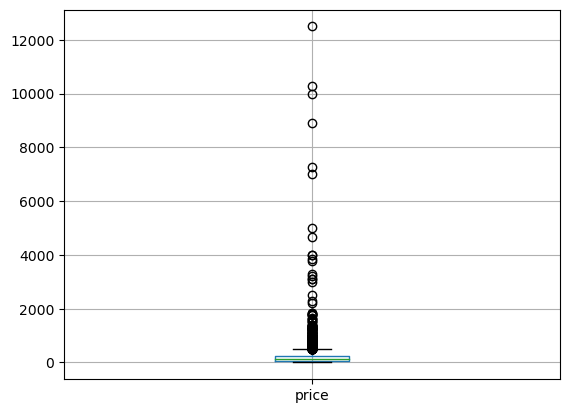

In [7]:
# Check for outlier with bloxplot

df_list.boxplot(column='price')
plt.show()

In [8]:
# Calculate outlier
# Q1 = np.quantile(df_all['price'], .25)
# Q3 = np.quantile(df_all['price'], .75)
# IQR = Q3 - Q1

# min_IQR = Q1 - 1.5 * IQR
# max_IQR = Q3 + 1.5 * IQR

# max_price = df_all[df_all['price'] > 224.5]
# max_price.sort_values(by='price')

In [9]:
df_list['price'].describe()

count     4161.000000
mean       214.505167
std        454.921421
min          0.000000
25%         60.000000
50%        120.000000
75%        235.000000
max      12494.000000
Name: price, dtype: float64

<b>There is an outlier in the price column, but we see realistically that this is the rental price. Property owners set varying prices, which is why there are very high prices. So, we dont need to clear outlier.<b>

## Merge Data

In [10]:
# DataFrame review join DataFrame list

df_review_list = df_review.merge(df_list, how='left', on='id')
df_review_list.head(5)

,id,date,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,71609,2018-07-14,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340
1,71609,2019-01-06,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340
2,71609,2019-07-27,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340
3,71609,2019-08-11,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340
4,71609,2019-09-07,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340


In [11]:
# DataFrame neighbourhood join DataFrame list

df_neighbourhood_list = df_neighbourhood.merge(df_list, on='neighbourhood')
df_neighbourhood_list.head(5)

,neighbourhood_group,neighbourhood,id,name,host_id,host_name,latitude,longitude,room_type,price,minimum_nights,availability_365
0,Central Region,Bishan,4926170,Room 4B in Terrace House @ Thomson Village,25375339,ｼﾝ,1.35349,103.83274,Private room,47,92,356
1,Central Region,Bishan,11128602,Luxury 3 bedroom condo. 1389sqf,57832356,Hwa Chiang,1.36628,103.83075,Entire home/apt,200,180,365
2,Central Region,Bishan,13243736,Charming 2Bed-2Bath- Parking Full Apartment,5092893,Sam,1.35725,103.82800,Entire home/apt,209,92,330
3,Central Region,Bishan,19438458,Modern zen bungalow in upper thomson,24759045,Yuichi,1.35732,103.82808,Private room,330,92,0
4,Central Region,Bishan,20865016,Lush Green Neighborhood Private Room,141856494,Kevin,1.35751,103.83001,Private room,50,92,363


In [12]:
# Join all dataframe

df_all = df_list.merge(df_review, on='id').merge(df_neighbourhood, on='neighbourhood')

# Change datatype
df_all['id'] = df_all['id'].astype('int')
df_all['date'] = pd.to_datetime(df_all.date)

# Add coloumn total_revenue, month, year, month_year
df_all['total_revenue'] = df_all['price'] * df_all['minimum_nights']
df_all["month"] = pd.to_datetime(df_all['date'], format=("%B")).dt.strftime("%B")
df_all['month_num'] = df_all['date'].dt.month
df_all["year"] = pd.to_datetime(df_all['date'], format=("%Y")).dt.strftime("%Y")
df_all["month_year"] = pd.to_datetime(df_all['date'], format=("%Y - %m")).dt.strftime("%Y - %m")

df_all = df_all[["id","date", "month_year","month", 'month_num',"year","name","host_id","host_name","neighbourhood_group","neighbourhood","latitude","longitude","room_type","price","minimum_nights","availability_365", "total_revenue"]]

df_all.head(5)

,id,date,month_year,month,month_num,year,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,total_revenue
0,71609,2018-07-14,2018 - 07,July,7,2018,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34537,103.95887,Private room,145,92,340,13340
1,71609,2019-01-06,2019 - 01,January,1,2019,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34537,103.95887,Private room,145,92,340,13340
2,71609,2019-07-27,2019 - 07,July,7,2019,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34537,103.95887,Private room,145,92,340,13340
3,71609,2019-08-11,2019 - 08,August,8,2019,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34537,103.95887,Private room,145,92,340,13340
4,71609,2019-09-07,2019 - 09,September,9,2019,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34537,103.95887,Private room,145,92,340,13340


In [13]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49695 entries, 0 to 49694
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   49695 non-null  int64         
 1   date                 49695 non-null  datetime64[ns]
 2   month_year           49695 non-null  object        
 3   month                49695 non-null  object        
 4   month_num            49695 non-null  int64         
 5   year                 49695 non-null  object        
 6   name                 49695 non-null  object        
 7   host_id              49695 non-null  int64         
 8   host_name            49695 non-null  object        
 9   neighbourhood_group  49695 non-null  object        
 10  neighbourhood        49695 non-null  object        
 11  latitude             49695 non-null  float64       
 12  longitude            49695 non-null  float64       
 13  room_type            49695 non-

# Export Data

In [14]:
# df_review_list.to_csv('DataFrame_review_list.csv', index=False)
# df_neighbourhood_list.to_csv('DataFrame_neighbourhood_list.csv', index=False)
# df_all.to_csv('DataFrame_all.csv', index=False)

# Exploratory Data Analysis

## Problem Identification
1. Which neighbourhood group has the most visitors and generates the most profit ?

2. Which neighbourhood is the most suitable for rental properties with maximum profit ?

3. What type of room is most in demand and generate maximum profit ?

4. When is the right time for property owners to rent out their property?

### 1. Which neighbourhood group has the most visitors and generates the most profit ?

In [15]:
# The number of visitors in each neighbourhood group

ng_vis = df_all.groupby('neighbourhood_group').agg(total_visitor=('id', 'count')).sort_values(by='total_visitor', ascending=False).reset_index()
ng_vis

,neighbourhood_group,total_visitor
0,North Region,22915
1,Central Region,18520
2,West Region,5207
3,East Region,2023
4,North-East Region,1030


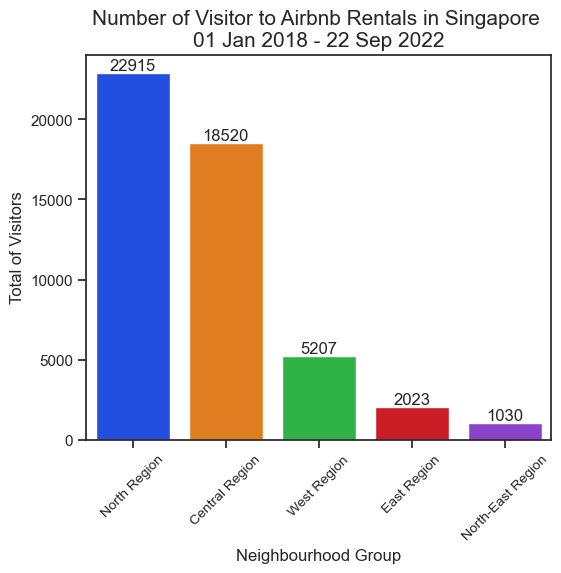

In [16]:
# The number of visitors in each neighbourhood group - Visualization

# Set Seaborn style
sns.set(style="ticks")

# Create the bar plot using Seaborn
plt.figure(figsize=(6, 5))
ax = sns.barplot(x='neighbourhood_group', y='total_visitor', data=ng_vis, palette='bright')

# Add value labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Set plot title and labels
plt.title('Number of Visitor to Airbnb Rentals in Singapore \n01 Jan 2018 - 22 Sep 2022', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total of Visitors')

# Add an average line
# average_visitor = np.mean(ng_vis['total_visitor'])
# plt.axhline(y=average_visitor, color='red', linestyle='--', label='Avg')

# Add small lines near axes
# plt.annotate(f'Avg: {average_visitor:.0f}', xy=(2, average_visitor), xytext=(-0.15, average_visitor),
#              arrowprops=dict(facecolor='red', arrowstyle='->'))

# Show the plot
plt.show()

In [17]:
# Airbnb rental trends by neighbourhood group

tren_ng = df_all[['neighbourhood_group', 'date']].copy()
tren_ng.sort_values('date', inplace=True)
tren_ng.head()

,neighbourhood_group,date
9008,Central Region,2018-01-01
20803,North Region,2018-01-01
18046,Central Region,2018-01-01
16614,North-East Region,2018-01-01
18047,Central Region,2018-01-01


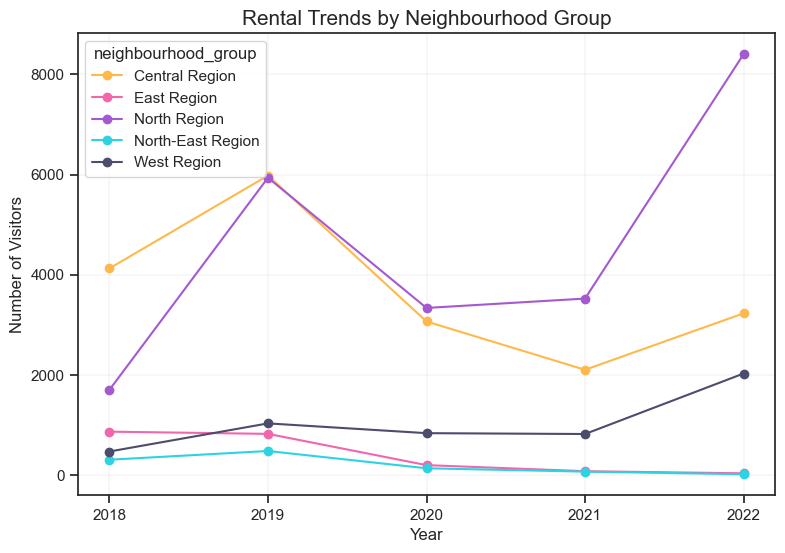

In [18]:
# Airbnb rental trends by neighbourhood group - Visualization

fig, ax = plt.subplots(figsize=(9,6))
tren_ng.groupby(
    [tren_ng.date.dt.year, tren_ng.neighbourhood_group]).count()['date'].unstack().plot(ax=ax, color=['#FFB84C','#F266AB', '#A459D1','#2CD3E1','#4C4C6D'], marker='o', linestyle='-')

plt.title('Rental Trends by Neighbourhood Group', fontsize=15)
plt.xticks(tren_ng.date.dt.year.unique().tolist())
plt.xlabel("Year")
plt.ylabel("Number of Visitors")

plt.grid(linewidth=0.20)

# Move the legend outside the plot area
# ax.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.show()

In [19]:
# Average price in each neighbourhood group
avg_price_ng = df_neighbourhood_list.groupby('neighbourhood_group').agg(average_price=('price', 'mean')).sort_values(by='average_price', ascending=False).reset_index()
avg_price_ng['average_price'] = np.round(avg_price_ng['average_price']).astype('int64')
avg_price_ng

,neighbourhood_group,average_price
0,Central Region,253
1,East Region,217
2,North-East Region,195
3,West Region,165
4,North Region,128


In [20]:
df_neighbourhood_list['price'].describe()

count     4161.000000
mean       214.505167
std        454.921421
min          0.000000
25%         60.000000
50%        120.000000
75%        235.000000
max      12494.000000
Name: price, dtype: float64

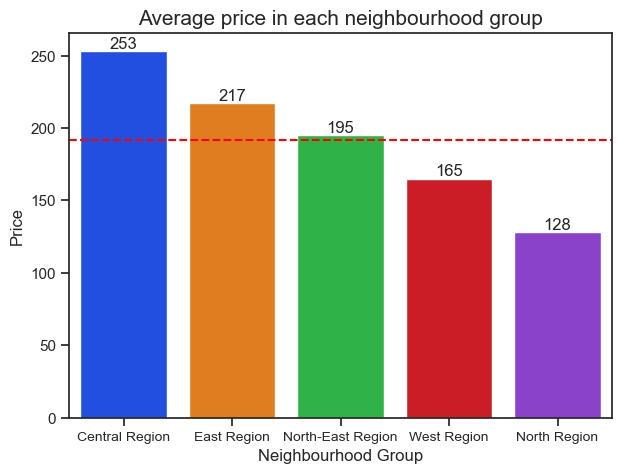

In [21]:
# Average price in each neighbourhood group - Visualization

# Set Seaborn style
sns.set(style="ticks")

# Create the bar plot using Seaborn
plt.figure(figsize=(7, 5))
ax = sns.barplot(x='neighbourhood_group', y='average_price', data=avg_price_ng, palette='bright')


# Add value labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Set plot title and labels
plt.title('Average price in each neighbourhood group', fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')

# Add an average line
average_price = np.mean(avg_price_ng['average_price'])
plt.axhline(y=average_price, color='red', linestyle='--', label='Avg')

# Show the plot
plt.show()

# -------------------------------------------------------------------------------------------

### 2. Which neighbourhood is the most suitable for rental properties with maximum profit ?

In [22]:
# The number of visitors in each neighbourhood

n_vis = df_all.groupby(['neighbourhood', 'neighbourhood_group'])['id'].count().reset_index()
n_vis.columns = ['neighbourhood', 'neighbourhood_group', 'total_visitor']
n_vis = n_vis.sort_values(by='total_visitor', ascending=False).head(10)
n_vis

,neighbourhood,neighbourhood_group,total_visitor
40,Woodlands,North Region,20095
39,Western Water Catchment,West Region,4551
15,Kallang,Central Region,2984
10,Downtown Core,Central Region,2756
29,Rochor,Central Region,2707
24,Outram,Central Region,2599
16,Lim Chu Kang,North Region,2336
11,Geylang,Central Region,1727
4,Bukit Merah,Central Region,1270
1,Bedok,East Region,1094


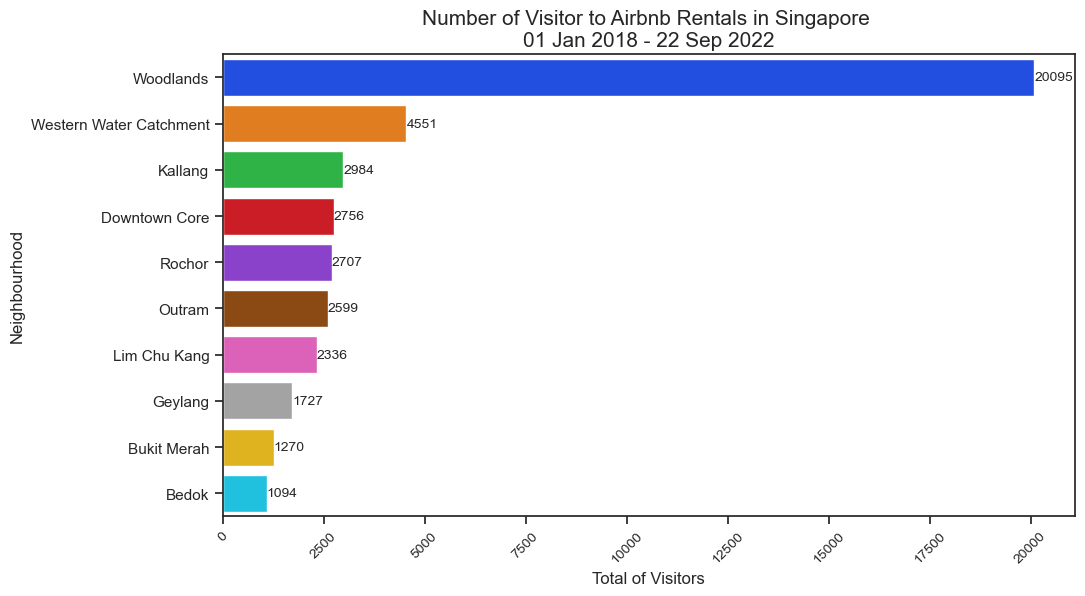

In [23]:
# The number of visitors in each neighbourhood - Visualization

# Set Seaborn style
sns.set(style="ticks")

# Create the bar plot using Seaborn
plt.figure(figsize=(11, 6))
ax = sns.barplot(y='neighbourhood', x='total_visitor', data=n_vis, palette='bright')

# Add value labels
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'),  # Use get_width() for horizontal bars
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10)

# Set plot title and labels
plt.title('Number of Visitor to Airbnb Rentals in Singapore \n01 Jan 2018 - 22 Sep 2022', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.xlabel('Total of Visitors')
plt.ylabel('Neighbourhood')

# Add an average line
# average_visitor = np.mean(vis['total_of_visitor'])
# plt.axhline(y=average_visitor, color='red', linestyle='--', label='Avg')

# Show the plot
plt.show()

In [24]:
# Average price in each neighbourhood

avg_price_n = df_neighbourhood_list.groupby(['neighbourhood', 'neighbourhood_group']).agg(average_price=('price', 'mean')).sort_values(by='average_price', ascending=False).reset_index()
avg_price_n['average_price'] = np.round(avg_price_n['average_price']).astype('int64')
# avg_price_n = avg_price_n.head(10)
avg_price_n

,neighbourhood,neighbourhood_group,average_price
0,Tuas,West Region,5178
1,Southern Islands,Central Region,1554
2,Marina South,Central Region,685
3,Orchard,Central Region,573
4,Pasir Ris,East Region,524
5,Central Water Catchment,North Region,345
6,Hougang,North-East Region,323
7,Downtown Core,Central Region,323
8,Clementi,West Region,316
9,Newton,Central Region,309


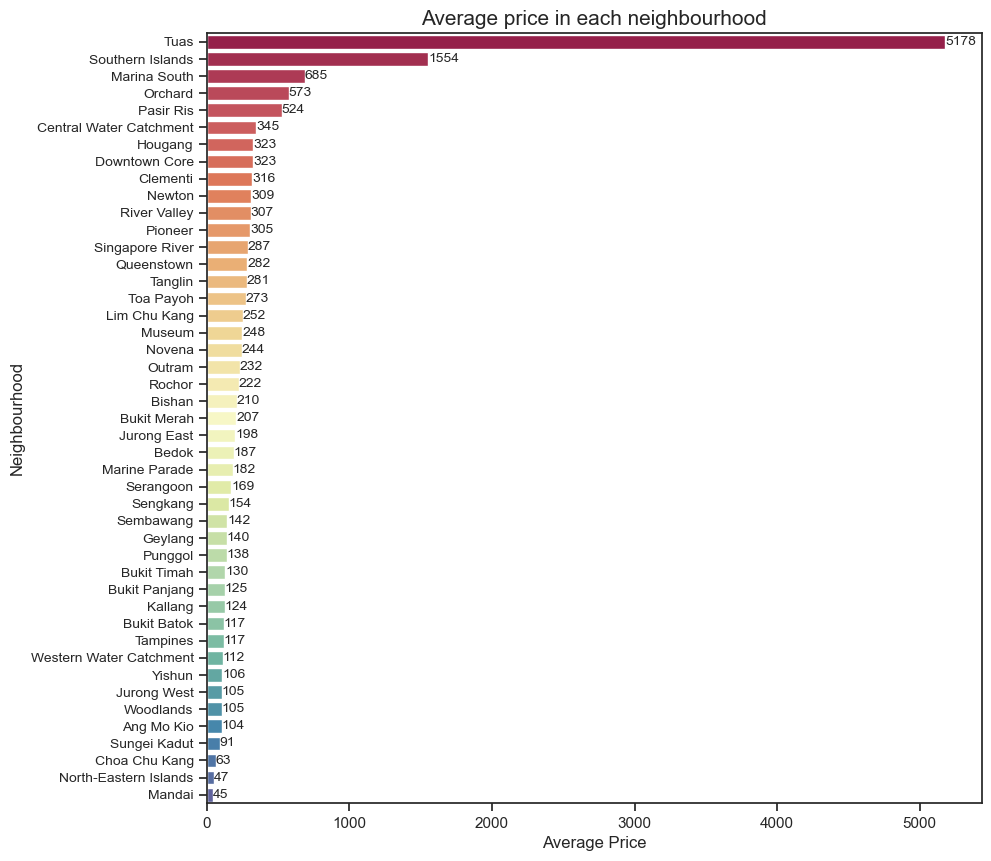

In [25]:
# Average price in each neighbourhood - Visualization

# Set Seaborn style
sns.set(style="ticks")

# Create the horizontal bar plot using Seaborn by swapping 'x' and 'y'
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='average_price', y='neighbourhood', data=avg_price_n, palette='Spectral')

# Add value labels
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'),  # Use get_width() for horizontal bars
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10)

# Set plot title and labels
plt.title('Average price in each neighbourhood', fontsize=15)
plt.yticks(fontsize=10)  # Adjust the fontsize for y-ticks
plt.ylabel('Neighbourhood')
plt.xlabel('Average Price')

# Show the plot
plt.show()


# -------------------------------------------------------------------------------------------

### 3. What type of room is most in demand and generate maximum profit ?

In [26]:
# The number of visitors in each room_type

rt_vis = df_all.groupby('room_type').agg(total_visitor=('id', 'count')).sort_values(by='total_visitor', ascending=False).reset_index()
rt_vis

,room_type,total_visitor
0,Entire home/apt,33654
1,Private room,13264
2,Hotel room,2045
3,Shared room,732


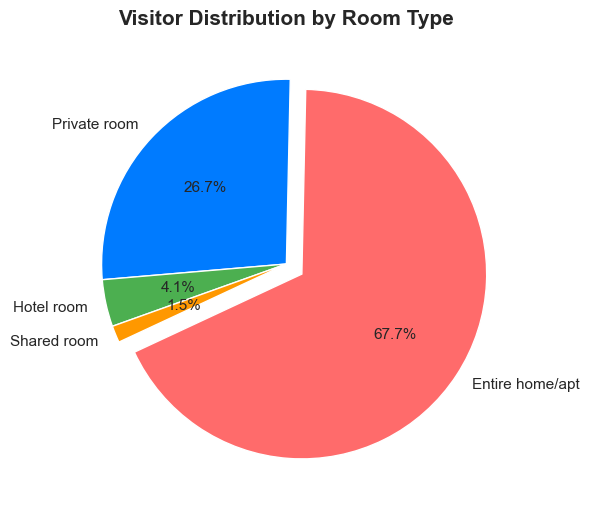

In [27]:
# The number of visitors in each room_type - Visualization

# Data
room_types = rt_vis['room_type']
total_visitors = rt_vis['total_visitor']

# Create a pie chart with custom fontsize for percentage labels
plt.figure(figsize=(6, 6))
explode = (0.1, 0, 0, 0)  # Explode a slice if you want
plt.pie(
    total_visitors,
    labels=room_types,
    autopct=lambda p: f'{p:.1f}%',  # Customize the percentage format
    startangle=205,
    colors=['#FF6B6B', '#007BFF', '#4CAF50', '#FF9800'],
    labeldistance=1.1,
    explode=explode,
    textprops={'fontsize': 11}  # Adjust the fontsize here
)

# Show the pie chart
plt.title('Visitor Distribution by Room Type', fontsize=15, weight='bold')
plt.show()

In [28]:
# Average price in each room type

avg_price_rt = df_list.groupby('room_type').agg(average_price=('price', 'mean')).sort_values(by='average_price', ascending=False).reset_index()
avg_price_rt['average_price'] = np.round(avg_price_rt['average_price']).astype(int)
avg_price_rt

,room_type,average_price
0,Entire home/apt,257
1,Private room,164
2,Hotel room,160
3,Shared room,117


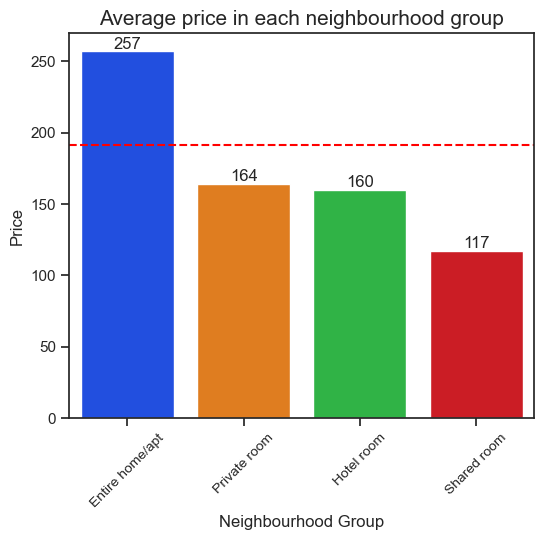

In [29]:
# Average price in each room type - Visualization

# Set Seaborn style
sns.set(style="ticks")

# Create the bar plot using Seaborn
plt.figure(figsize=(6, 5))
ax = sns.barplot(x='room_type', y='average_price', data=avg_price_rt, palette='bright')


# Add value labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Set plot title and labels
plt.title('Average price in each neighbourhood group', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')

# Add an average line
average_price = np.mean(avg_price_ng['average_price'])
plt.axhline(y=average_price, color='red', linestyle='--', label='Avg')

# Show the plot
plt.show()

In [30]:
# average price each room type per neighbourhood group

rt_ngg = df_neighbourhood_list.groupby(['neighbourhood_group', 'room_type']).agg(avg_price=('price', 'mean')).sort_values(by='avg_price', ascending=False).reset_index()

pivot2 = pd.pivot_table(data=rt_ngg, index=['neighbourhood_group'], columns=['room_type'], values='avg_price')
# pivot2 = pivot2.sort_values('Entire home/apt', ascending=False)
pivot2

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Central Region,331.189853,169.225564,188.942360,111.962963
East Region,551.705882,NaN,129.330827,282.250000
North Region,138.071646,54.272727,88.910345,94.500000
North-East Region,444.214286,NaN,101.111111,120.333333
West Region,185.907692,NaN,101.169355,71.000000


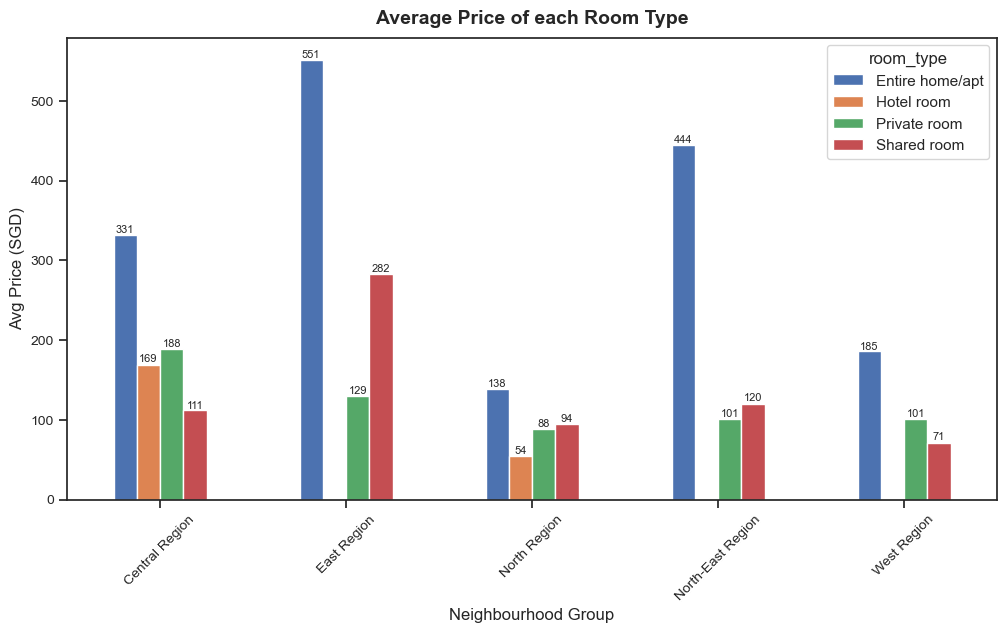

In [31]:
# Total of each room type per neighbourhood group - Visualization

# Create a bar chart from the pivot table
ax = pivot2.plot(kind='bar', figsize=(12,6))

# Set plot title and labels
plt.title('Average Price of each Room Type', fontsize=14, weight='bold', pad=10)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Avg Price (SGD)')

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(str(height), (p.get_x() + p.get_width() / 2., height + 1), ha='center', va='bottom', fontsize=8)

# Show the bar chart
plt.show()

In [32]:
# Total of each room type per neighbourhood group

rt_ng = df_all.groupby(['neighbourhood_group', 'room_type']).agg(counts=('room_type', 'count')).sort_values(by='counts', ascending=False).reset_index()

pivot = pd.pivot_table(data=rt_ng, index=['neighbourhood_group'], columns=['room_type'], values='counts')
pivot = pivot.sort_values('Entire home/apt', ascending=False)
pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
North Region,21603.0,337.0,963.0,12.0
Central Region,6683.0,1708.0,9415.0,714.0
West Region,4562.0,NaN,644.0,1.0
East Region,520.0,NaN,1503.0,NaN
North-East Region,286.0,NaN,739.0,5.0


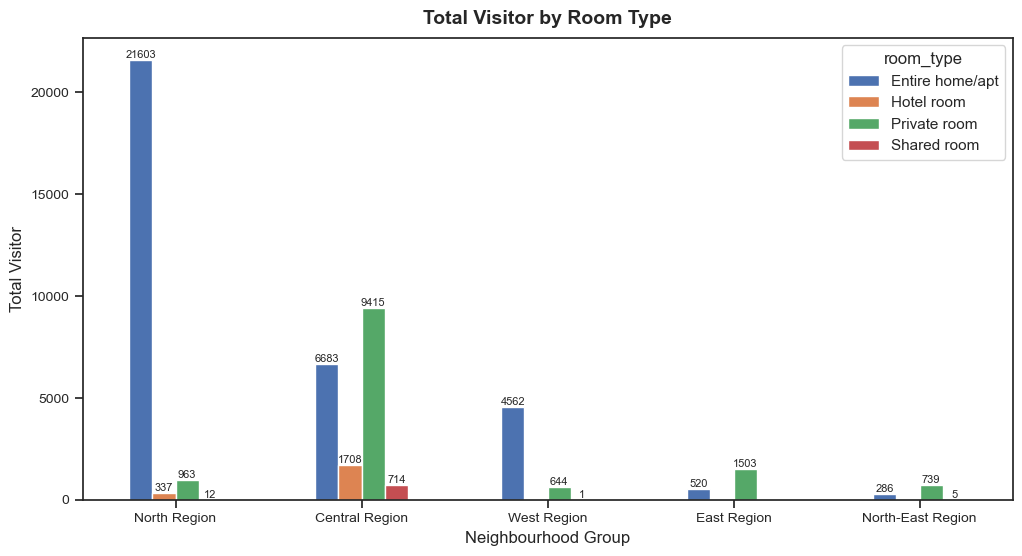

In [33]:
# Total of each room type per neighbourhood group - Visualization

# Create a bar chart from the pivot table
ax = pivot.plot(kind='bar', figsize=(12,6))

# Set plot title and labels
plt.title('Total Visitor by Room Type', fontsize=14, weight='bold', pad=10)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Visitor')

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(str(height), (p.get_x() + p.get_width() / 2., height + 1), ha='center', va='bottom', fontsize=8)

# Show the bar chart
plt.show()

# -------------------------------------------------------------------------------------------

### 4. When is the right time for property owners to rent out their property?

In [34]:
sewa_blnthn = df_all.groupby('month_year')['month_year'].count()
df_sewa_blnthn=pd.DataFrame({'month_year':sewa_blnthn.index, 'count':sewa_blnthn.values})
df_sewa_blnthn.head()

,month_year,count
0,2018 - 01,447
1,2018 - 02,432
2,2018 - 03,507
3,2018 - 04,527
4,2018 - 05,548


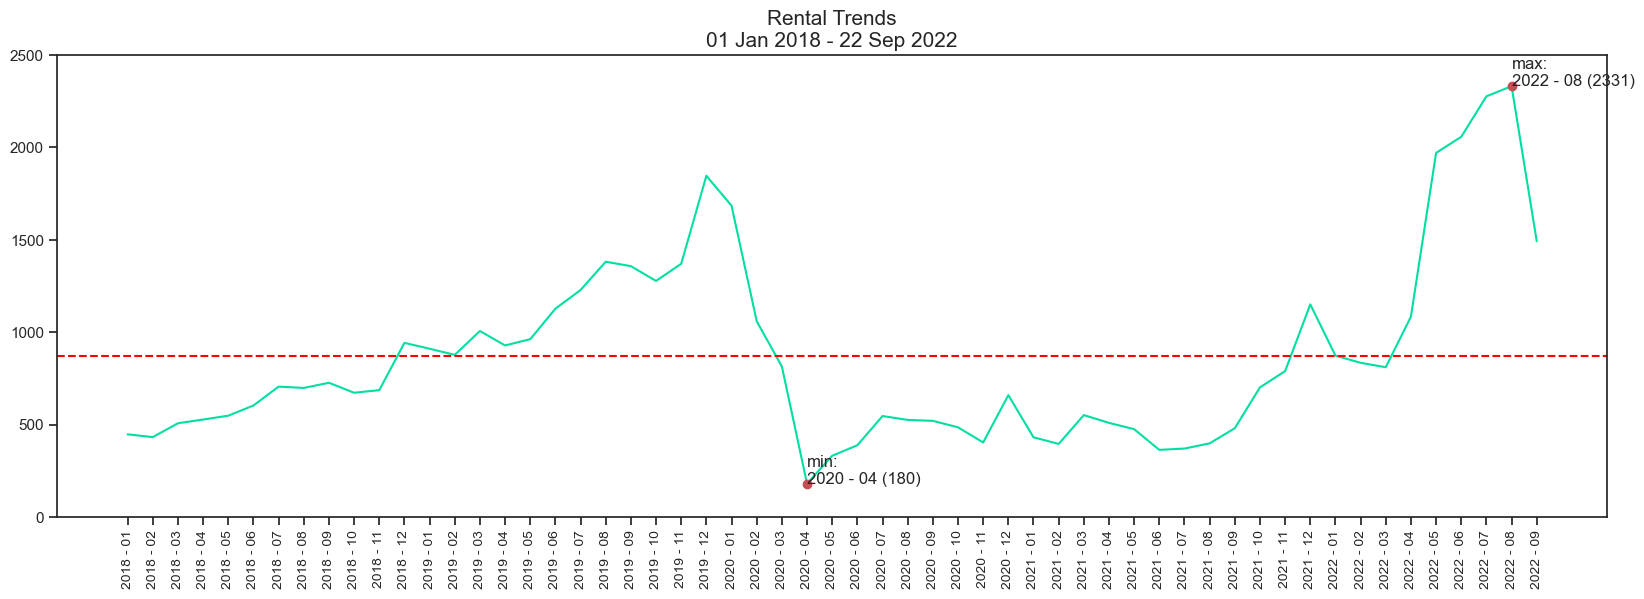

In [35]:
# Sample data
x = df_sewa_blnthn['month_year']
y = df_sewa_blnthn['count'].tolist()

plt.subplots(figsize=(20, 6))
plt.plot(x, y, color='#00DFA2')

plt.xticks(fontsize=10, rotation=90)
plt.title('Rental Trends\n01 Jan 2018 - 22 Sep 2022', fontsize=15)

# Annotate Max
ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
plt.plot(xmax, ymax, 'ro')
plt.text(xmax, ymax + 3, 'max:' + '\n' + str(xmax) + ' (' + str(ymax) + ')')

# Annotate Min
ymin = min(y)
xpos = y.index(ymin)
xmin = x[xpos]
plt.plot(xmin, ymin, 'ro')
plt.text(xmin, ymin, 'min:' + '\n' + str(xmin) + ' (' + str(ymin) + ')')

# Average Line
plt.axhline(y=np.nanmean(y), color='red', linestyle='--', label='Avg')

# Customize y-axis ticks
yticks = np.arange(0, 2501, 500)  # Create ticks from 0 to 2500 with steps of 250
plt.yticks(yticks)

plt.show()

In [36]:
sewa_bln = df_all.groupby(['month'])['month'].count()
df_sewa_bln=pd.DataFrame({'month':sewa_bln.index, 'count':sewa_bln.values})

df_sewa_bln["month_number"] = pd.to_datetime(df_sewa_bln.month, format='%B', errors='coerce').dt.month
df_sewa_bln = df_sewa_bln.sort_values(by="month_number")

df_sewa_bln

,month,count,month_number
4,January,4345,1
3,February,3597,2
7,March,3688,3
0,April,3228,4
8,May,4286,5
6,June,4538,6
5,July,5125,7
1,August,5333,8
11,September,4575,9
10,October,3135,10


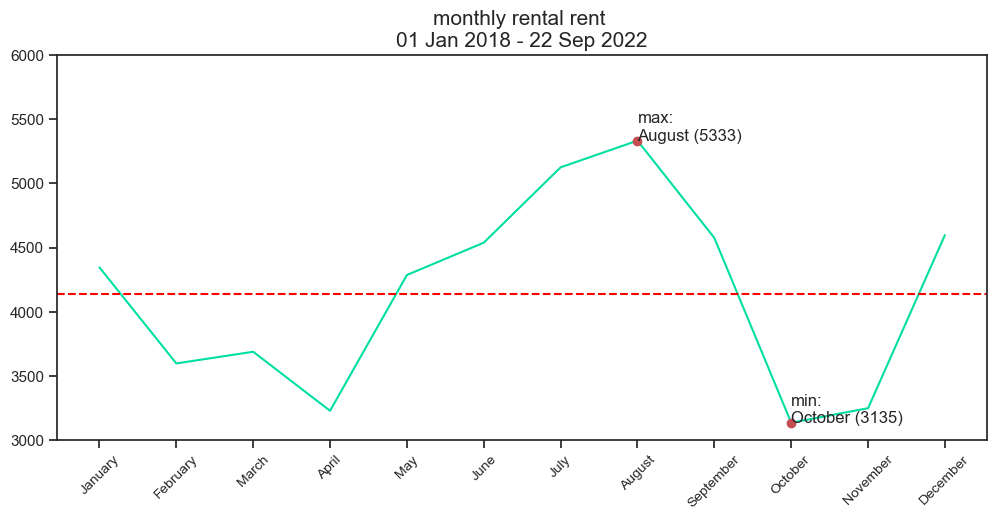

In [37]:
x = df_sewa_bln['month'].tolist()
y = df_sewa_bln['count'].tolist()

plt.subplots(figsize=(12,5))
plt.plot(x, y, color='#00DFA2')

plt.xticks(fontsize=10, rotation=45)
plt.title('monthly rental rent \n01 Jan 2018 - 22 Sep 2022', fontsize=15)

# Annotate Max
ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
plt.plot(xmax, ymax, 'ro')
plt.text(xmax, ymax+3, 'max:' + '\n'+str(xmax)+ ' (' + str(ymax) + ')')

# Annotate Min
ymin = min(y)
xpos = y.index(ymin)
xmin = x[xpos]
plt.plot(xmin, ymin, 'ro')
plt.text(xmin, ymin, 'min:' + '\n'+str(xmin)+ ' (' + str(ymin) + ')')

# Average Line
plt.axhline(y=np.nanmean(y),color='red',linestyle='--', label='Avg')

# Customize y-axis ticks
yticks = np.arange(3000, 6001, 500)  # Create ticks from 0 to 2500 with steps of 250
plt.yticks(yticks)

plt.show()

# -------------------------------------------------------------------------------------------